In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os
from astropy.io import fits
from astropy.convolution import convolve, Box1DKernel
from matplotlib import rc

## Function for importing .hdf5 files

Song Huang, 2017

In [23]:
def load_spec_kast_hdf5(hdf5_file):
    hdf5_data = h5py.File(hdf5_file, 'r')
    hdf5_key = hdf5_data.keys()[0]
    hdf5_spec = hdf5_data[hdf5_key][0]
    
    return hdf5_spec[0], hdf5_spec[1], hdf5_spec[2]

## SDSS data

In [24]:
sdss_1_name = r'$\mathrm{SDSS\ J1617+4232}$'
sdss_1 = os.path.join('/Users/gsallabe/Downloads/sdss/spec-6035-56076-0453.fits')
sdss_1_z = 0.441
sdss_1_spec = fits.open(sdss_1)[1].data
sdss_1_wave = 10.0 ** sdss_1_spec['loglam']
sdss_1_flux = sdss_1_spec['flux']
sdss_1_model = sdss_1_spec['model']

sdss_2_name = r'$\mathrm{SDSS\ J1620+4227}$'
sdss_2 = os.path.join('/Users/gsallabe/Downloads/sdss/spec-0815-52374-0293.fits')
sdss_2_z = 0.474 
sdss_2_spec = fits.open(sdss_2)[1].data
sdss_2_wave = 10.0 ** sdss_2_spec['loglam']
sdss_2_flux = sdss_2_spec['flux']
sdss_2_model = sdss_2_spec['model']

sdss_3_name = r'$\mathrm{SDSS\ J2223+0137}$'
sdss_3 = os.path.join('/Users/gsallabe/Downloads/sdss/spec-4322-55503-0264.fits')
sdss_3_z = 0.370
sdss_3_spec = fits.open(sdss_3)[1].data
sdss_3_wave = 10.0 ** sdss_3_spec['loglam']
sdss_3_flux = sdss_3_spec['flux']
sdss_3_model = sdss_3_spec['model']

sdss_4_name = r'$\mathrm{SDSS\ J2240+0053}$'
sdss_4 = os.path.join('/Users/gsallabe/Downloads/sdss/spec-1037-52878-0576.fits')
sdss_4_z = 0.362
sdss_4_spec = fits.open(sdss_4)[1].data
sdss_4_wave = 10.0 ** sdss_4_spec['loglam']
sdss_4_flux = sdss_4_spec['flux']
sdss_4_model = sdss_4_spec['model']

## Kast data

In [67]:
kast_1_new = '/Users/gsallabe/Desktop/kast_data_7-14/new_sig_redux/kast_red_setup_A/science/J1617+4232_coadd_new.hdf5'
wav1_new, flux1_new, err1_new = load_spec_kast_hdf5(kast_1_new)

kast_2_new = '/Users/gsallabe/Desktop/kast_data_7-14/new_sig_redux/kast_red_setup_A/science/J1620+4227_coadd_new.hdf5'
wav2_new, flux2_new, err2_new = load_spec_kast_hdf5(kast_2_new)

kast_3_new = '/Users/gsallabe/Desktop/kast_data_7-14/new_sig_redux/kast_red_setup_A/science/J2223+0137_coadd_new.hdf5'
wav3_new, flux3_new, err3_new = load_spec_kast_hdf5(kast_3_new)

kast_4_new = '/Users/gsallabe/Desktop/kast_data_7-14/new_sig_redux/kast_red_setup_A/science/J2240+0053_coadd_new.hdf5'
wav4_new, flux4_new, err4_new = load_spec_kast_hdf5(kast_4_new)

# J1617+4232

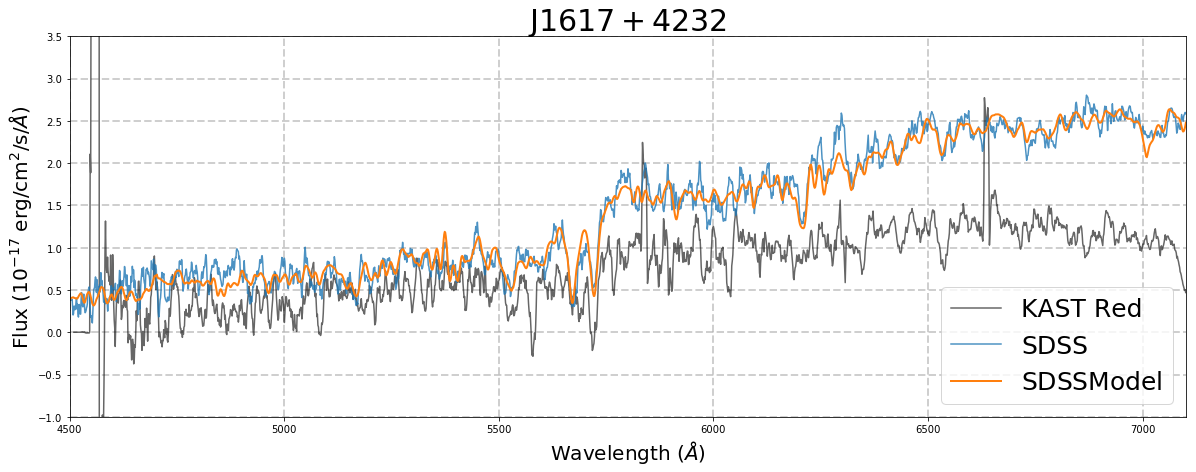

In [62]:
plt.figure(figsize=[20,7])
plt.grid(linestyle='--', linewidth=2.0, alpha=0.6)
plt.xlabel('Wavelength ($\AA$)', fontsize = 20)
plt.ylabel('Flux $(10^{-17}\ \mathrm{erg}/\mathrm{cm}^2/\mathrm{s}/\AA)$' , fontsize = 20)
plt.title(r'$\mathrm{J1617+4232}$', fontsize = 30)
plt.xlim(4500. , 7100.)
plt.ylim(-1.0 , 3.5)

plt.plot(wav1_new, convolve(flux1_new, Box1DKernel(9)), color='k',alpha=0.6, 
         label='KAST Red')
plt.plot(sdss_1_wave, convolve(sdss_1_flux, Box1DKernel(7)),alpha=0.8,label='SDSS')
plt.plot(sdss_1_wave, sdss_1_model, linewidth=2.0, label='$\mathrm{SDSS Model}$')
plt.legend(loc=4,fontsize=25)

# J1620+4227

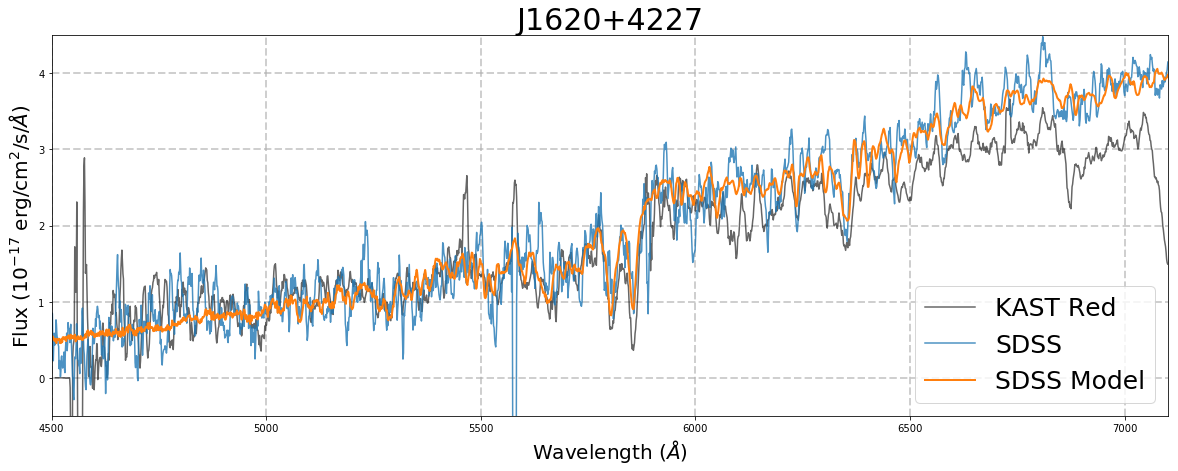

In [64]:
plt.figure(figsize=[20,7])
plt.grid(linestyle='--', linewidth=2.0, alpha=0.6)
plt.xlabel('Wavelength ($\AA$)', fontsize = 20)
plt.ylabel('Flux $(10^{-17}\ \mathrm{erg}/\mathrm{cm}^2/\mathrm{s}/\AA)$' , fontsize = 20)
plt.title('J1620+4227', fontsize = 30)
plt.xlim(4500. , 7100.)
plt.ylim(-0.5 , 4.5)

plt.plot(wav2_new, convolve(flux2_new, Box1DKernel(9)), color='k',alpha=0.6, 
         label='KAST Red')
plt.plot(sdss_2_wave, convolve(sdss_2_flux, Box1DKernel(7)),alpha=0.8, label='SDSS')
plt.plot(sdss_2_wave, sdss_2_model, linewidth=2.0, label='SDSS Model')
plt.legend(loc=4,fontsize=25)

CR cleaning not great in this spectrum, even with the changes to arproc.py and the agressive sigma-clipping in the coadd.

# 2223+0137

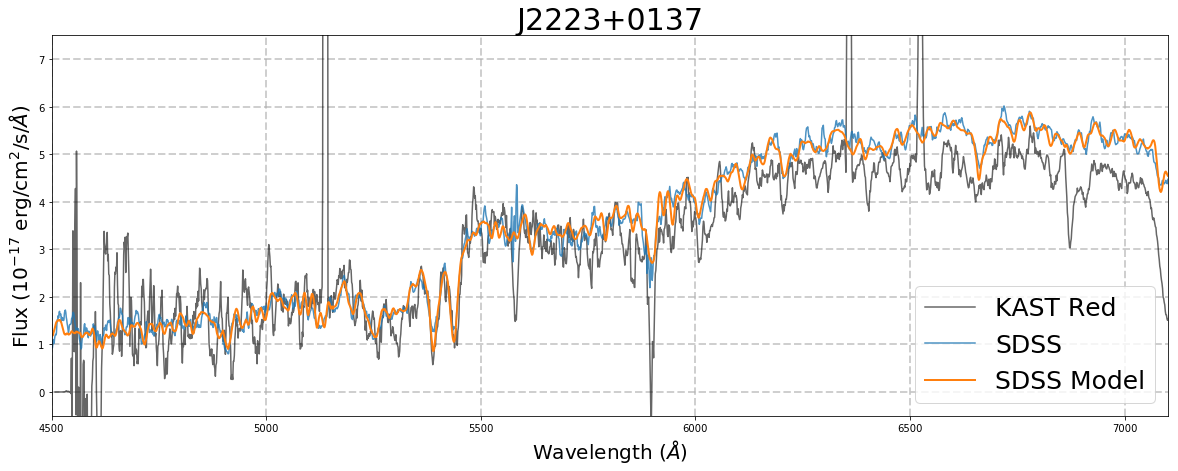

In [68]:
plt.figure(figsize=[20,7])
plt.grid(linestyle='--', linewidth=2.0, alpha=0.6)
plt.xlabel('Wavelength ($\AA$)', fontsize = 20)
plt.ylabel('Flux $(10^{-17}\ \mathrm{erg}/\mathrm{cm}^2/\mathrm{s}/\AA)$' , fontsize = 20)
plt.title('J2223+0137', fontsize = 30)
plt.xlim(4500. , 7100.)
plt.ylim(-0.5 , 7.5)

plt.plot(wav3_new, convolve(flux3_new, Box1DKernel(9)), color='k',alpha=0.6, 
         label='KAST Red')
plt.plot(sdss_3_wave, convolve(sdss_3_flux, Box1DKernel(7)),alpha=0.8,label='SDSS')
plt.plot(sdss_3_wave, sdss_3_model, linewidth=2.0, label='SDSS Model')
plt.legend(loc=4,fontsize=25)

# J2240+0053

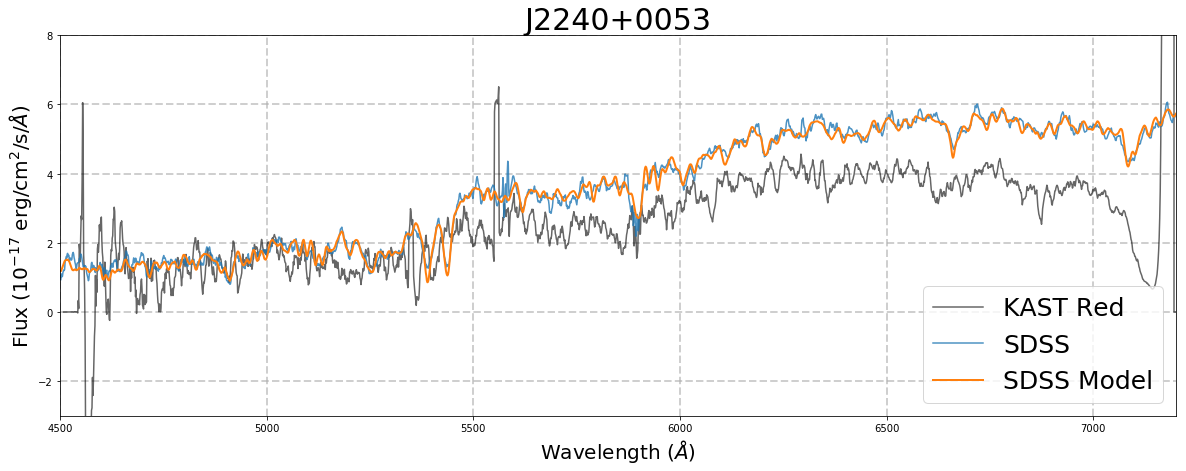

In [66]:
plt.figure(figsize=[20,7])
plt.grid(linestyle='--', linewidth=2.0, alpha=0.6)
plt.xlabel('Wavelength ($\AA$)', fontsize = 20)
plt.ylabel('Flux $(10^{-17}\ \mathrm{erg}/\mathrm{cm}^2/\mathrm{s}/\AA)$' , fontsize = 20)
plt.title('J2240+0053', fontsize = 30)
plt.xlim(4500. , 7200.)
plt.ylim(-3.0 , 8.0)
plt.plot(wav4_new, convolve(flux4_new, Box1DKernel(9)), color='k', alpha=0.6,
         label='KAST Red')
plt.plot(sdss_3_wave, convolve(sdss_3_flux, Box1DKernel(7)),alpha=0.8,label='SDSS')
plt.plot(sdss_3_wave, sdss_3_model, linewidth=2.0, label='SDSS Model')
plt.legend(loc=4,fontsize=25)